In [1]:
from pprint import pprint
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import tensorflow as tf
import keras
from tensorflow.python.framework import ops
#from cnn_utils import *
import os
os.environ['CUDA_VISIBLE_DEVICES']='-1'
import deepdish.io as io
from keras.models import Sequential, Model
from keras.layers import Input, Add, Dense, Dropout, LeakyReLU
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils import multi_gpu_model
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_curve, auc

/home/debo/env2/local/lib/python2.7/site-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/home/debo/env2/local/lib/python2.7/site-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/home/debo/env2/local/lib/python2.7/site-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g, h5i, h5o, h5r, h5t, h5l, h5p
/home/debo/env2/local/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/home/debo/env2/local/lib/python2.7/site-packages/scipy/linalg/__init__.py:207: Runtim

In [2]:
data_sig_A = io.load(os.path.join('MEM-A-0500_unscaled_signal.h5'))
data_sig_B = io.load(os.path.join('MEM-B-0500_unscaled_signal.h5'))
data_back_A = io.load(os.path.join('MEM-A-0500_unscaled_background.h5'))
data_back_B = io.load(os.path.join('MEM-B-0500_unscaled_background.h5'))

In [3]:
X_Big_train = data_sig_A['X']
target_BigSig_train = data_sig_A['signal_llh']
y_BigSig_train = data_sig_A['y']
target_BigBack_train = data_back_A['bkg_llh']
y_BigBack_train = data_back_A['y']

X_Big_test = data_sig_B['X']
target_BigSig_test = data_sig_B['signal_llh']
y_BigSig_test = data_sig_B['y']
target_BigBack_test = data_back_B['bkg_llh']
y_BigBack_test = data_back_B['y']

In [4]:
#Defining Sequential Model
def sequential_model():
    seqModel = Sequential()
    seqModel.add(Dense(32, input_dim=32, kernel_initializer='glorot_normal', activation='relu'))
    seqModel.add(Dense(12, kernel_initializer='glorot_normal', activation='relu'))
    seqModel.add(Dense(1, kernel_initializer='glorot_normal',activation='sigmoid'))
    seqModel.compile(loss='binary_crossentropy', optimizer='adam')
    return seqModel

In [5]:
sc_X = StandardScaler()
X_train1 = sc_X.fit_transform(X_Big_train)
X_test1 = sc_X.fit_transform(X_Big_test)
sig_model = sequential_model()
sig_train = sig_model.fit(X_train1, y_BigSig_train, epochs=20, batch_size=256, verbose=1)

Epoch 1/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.0721
Epoch 2/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.0499
Epoch 3/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.0466
Epoch 4/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.0446
Epoch 5/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.0434
Epoch 6/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.0422
Epoch 7/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.0412
Epoch 8/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.0403
Epoch 9/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.0393
Epoch 10/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.0387
Epoch 11/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.0382
Epoch 12

In [11]:
sig_train.history.keys()

['loss']

In [6]:
back_model = sequential_model()
back_train = back_model.fit(X_train1, y_BigBack_train, epochs=20, batch_size=256, verbose=1)

Epoch 1/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.6743
Epoch 2/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.6738
Epoch 3/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.6738
Epoch 4/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.6738
Epoch 5/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.6738
Epoch 6/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.6738
Epoch 7/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.6738
Epoch 8/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.6738
Epoch 9/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.6738
Epoch 10/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.6738
Epoch 11/20
3028985/3028985 [==============================] - 19s 6us/step - loss: 0.6738
Epoch 12

In [7]:
#evaluating signal model
sig_test = sig_model.evaluate(X_test1, y_BigSig_test, batch_size=256, verbose=1)


151449/151449 [==============================] - 0s 3us/step


In [8]:
back_test = back_model.evaluate(X_test1, y_BigBack_test, batch_size=256, verbose=1)

151449/151449 [==============================] - 0s 3us/step


In [9]:
sig_predict = sig_model.predict(X_test1,verbose=1)

151449/151449 [==============================] - 2s 11us/step


In [10]:
back_predict = back_model.predict(X_test1,verbose=1)

151449/151449 [==============================] - 2s 12us/step


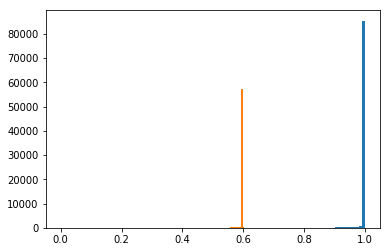

In [37]:
_=plt.hist(sig_predict[np.where(y_BigSig_test==1)],bins=100)
_=plt.hist(back_predict[np.where(y_BigSig_test==0)],bins=100)

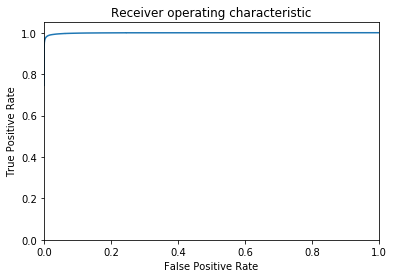

In [41]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_BigSig_test, sig_predict)
    roc_auc[i] = auc(fpr[i], tpr[i])

#print roc_auc_score(test, pred)
plt.figure()
plt.plot(fpr[0], tpr[0])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()